# 농어(Perch) 무게 예측 모델링 및 비교 분석

# 1. 데이터 준비

In [1]:
import pandas as pd
df = pd.read_csv("Data/perch2.csv")
df

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0
5,18.0,5.22,3.32,100.0
6,18.7,5.20,3.12,78.0
7,19.0,5.64,3.05,80.0
8,19.6,5.14,3.04,85.0
9,20.0,5.08,2.77,85.0


In [11]:
X = df.drop("weight", axis = 1).values
Y = df["weight"].values

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)         # 표준화
test_scaled = ss.transform(test_x)

# 2. K-최근접 이웃(KNN) 회귀 모델 개발

In [12]:
from sklearn.neighbors import KNeighborsRegressor      # 회귀모델 불러옴
model = KNeighborsRegressor()
model.fit(train_scaled, train_y)

KNeighborsRegressor()

In [13]:
box = []
for n in range(1,31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    box.append(score)

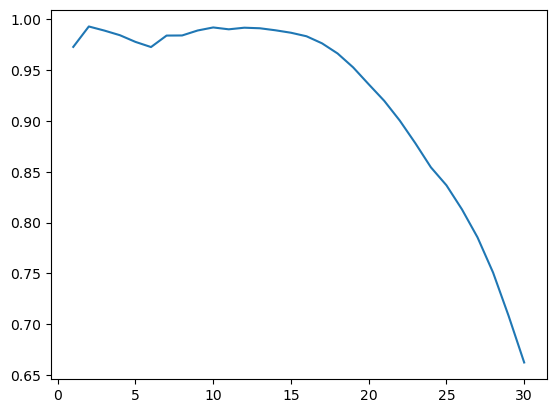

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), box)
plt.show()

# 2를 

In [17]:
model.n_neighbors = 2
model.score(test_scaled, test_y)

0.9927769521152404

In [18]:
model.n_neighbors = 3
model.score(test_scaled, test_y)

0.9887540414285694

In [19]:
model.n_neighbors = 10
model.score(test_scaled, test_y)

0.9918193732124959

In [21]:
# k=2에서 R^2 점수 기준 가장 높은 성능을 보이므로 k=2일때를 최종 knn모델로 선정
model.n_neighbors = 2

In [23]:
# R^2
model.score(test_scaled, test_y)

# 이 모델이 실제값을 99.3% 정도 설명한다

0.9927769521152404

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = model.predict(test_scaled)

In [25]:
# MAE
mean_absolute_error(test_y, pred)

19.107142857142858

In [27]:
# RMSE
mean_squared_error(test_y, pred) ** (1/2)

25.843968624917387

# 3. 선형 회귀 모델 개발

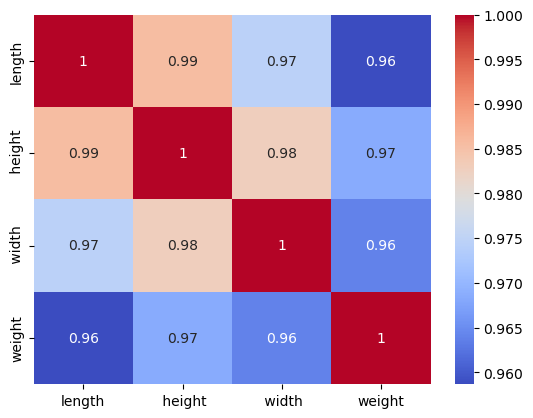

In [112]:
import seaborn as sns
df = pd.read_csv("Data/perch2.csv")
corr = df.corr()

sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()
# 대체적으로 상관관계가 종속변수 weight와 다 높게 나온다 

In [146]:
X = df.drop("weight", axis=1)
Y = df["weight"]

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

from sklearn.linear_model import LinearRegression
model = LinearRegression()     # 표준화된 훈련데이터로 학습
model.fit(train_scaled, train_y)

LinearRegression()

In [147]:
# R^2
model.score(test_scaled, test_y)

# 이 모델이 실제값을 90.7% 정도 설명한다

0.9252953935173827

In [92]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [153]:
# 라쏘 
model = Ridge(alpha = 1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9327184710759748

In [149]:
# 릿지
model = Lasso(alpha = 1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9253433068191822

In [150]:
# 엘라스틱넷
model = ElasticNet(alpha = 1, l1_ratio=0.5)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.88667269637359

=> 라쏘 회귀를 사용하였을 때의 R^2이 0.93으로 가장 높게 나타났다

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = model.predict(test_scaled)

In [155]:
# MAE
mean_absolute_error(test_y, pred)   

64.23542289487793

In [156]:
# RMSE
mean_squared_error(test_y, pred) ** (1/2)

87.81563872282992

In [157]:
model = LinearRegression()
model.fit(X, Y)       # 훈련데이터가아닌 전체 데이터에 대해 학습

LinearRegression()

In [158]:
model.coef_

array([ 2.9082713 , 67.20469902, 67.26029602])

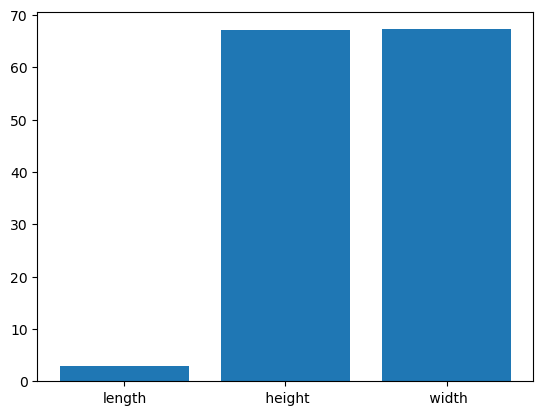

In [159]:
plt.bar(df.columns[:-1], model.coef_)
plt.show()
# 농어의 무게 예측에 가장 중요하게 작용한 특성은 height와 width였다

# 4. 모델 성능 비교 및 안정성 분석

최고성능 knn  
R^2 : 0.9927769521152404  
MAE : 19.107142857142858  
RMSE : 25.843968624917387  

최고성능 선형회귀모형  
R^2 : 0.9327184710759748  
MAE : 64.23542289487793  
RMSE : 87.81563872282992  

KNN과 선형 회귀의 R^2, MAE, RMSE 값을 비교했을 때,

- MAE 비교: KNN의 MAE는 19.11, 선형 회귀는 65.24로 KNN의 오차가 더 작다. 즉 KNN이 전반적으로 더 정확한 예측을 수행한다고 해석할 수 있다.

- RMSE 비교: KNN의 RMSE는 25.84, 선형 회귀는 87.82로 KNN이 더 낮다. RMSE는 큰 오차에 민감하므로, 선형 회귀의 RMSE가 높은 것은 일부 예측값에서 큰 오차가 발생했다고 해석할 수 있다.

=> KNN이 전반적으로 더 나은 예측 성능을 보인다

각 모델 내에서 MAE와 RMSE 비교  

- KNN 모델 (MAE = 19.11, RMSE = 25.84)  
RMSE가 MAE보다 약간 더 크지만, 차이가 크지는 않은 걸로 보인다.  
=> KNN은 전반적으로 안정적인 예측을 수행하며, 큰 오차(outlier)에 상대적으로 덜 민감하다.

- 선형 회귀 모델 (MAE = 64.24, RMSE = 87.82)  
RMSE가 MAE보다 눈에 띄게 더 크다 = 일부 예측값에서 큰 오차(outlier)가 발생한 것으로 보인다  
=> 선형 회귀 모델은 이상치에 더 민감하게 반응하여 일부 데이터에서 큰 오차를 보인다.

=> KNN은 선형 회귀보다 이상치에 덜 민감하고 예측이 더 안정적인 반면, 선형 회귀는 이상치의 영향을 크게 받아 오차가 더 커지는 경향을 보인다.